# Hovercraft Project

By Scott Colton

In this project, I wanted to calculate and animate the motion of a hovercraft with a constant force applied on a point some variable distance from the center

**This project accomplished the goal by using two sets of ODE's and the Runge-Kutta 4 method**

The two ODEs that are mentioned above are the following $$\dfrac{dv}{dt} = \dfrac{F}{m}$$

and 

$$\dfrac{d\omega}{dt} = \dfrac{\tau}{I}$$


where I is the moment of inertia of the hovercraft and m is the mass of the hovercraft.

After the ODE's were given there place in the set of variables, the program could simulate the hovercraft. There are limitations to what the system because of a few assumptions that I had made. First, I had assumed a massless leaf blower that was providing the constant force and torque on the hovercrafft. Second, there are collisions in my program but there is no friction. This combined with the constant force means that energy approaches infinity if the simulation runs for long enough.

# Defining Variables

All of my variables were defined based on my assumptions and knowledge of the hovercrafts. The only thing in my program that is inaccurate is the moment of inertia because in my pursuit to make the hovercraft go in cool patterns, I changed it to alter the simulation. I set my time step to .01 because any lower and the simulation would take too long to simulate a significant length of motion.

# Verification

I verified the code by calculating the energies and total energy of the system. As mentioned previously, there is no friction and there is a constant force being applied so the total energy of the system should be increasing over time. The graphs agree with reality and the system is verified to be at least mostly accurate with my assumptions.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from vpython import *

In [77]:
def rk4(diffeq, yn, tn, h):
    
    k1 = h*diffeq(yn, tn)
    k2 = h*diffeq(yn + k1/2, tn + h/2)
    k3 = h*diffeq(yn + k2/2, tn + h/2)
    k4 = h*diffeq(yn + k3, tn + h)
    yn1 = yn + k1/6 + k2/3 + k3/3 + k4
    
    return yn1


In [78]:
def hovercraft(data, t):
    
    theta = data[0]
    omega = data[1]
    x = data[2]
    y = data[3]
    vx = data[4]
    vy = data[5]

    derivs = np.zeros(6)
    derivs[0] = omega
    derivs[1] = tau / I
    derivs[2] = vx
    derivs[3] = vy
    derivs[4] = - F * np.sin(theta) / m
    derivs[5] = F * np.cos(theta) / m
    
    return derivs

In [103]:
#Initializing all the constants

Rad = .75
m = 25
I = 15 # .5 * m * Rad**2 currently 7.06
L = Rad * 8

h = 0.01
tmax = 30
N = int(tmax/h)
F = 3
R = .05 * Rad
tau = F * R

vy0 = .1
vx0 = 0
omega0 = np.pi/6   #Sets the initial velocity and the rotational velocity

#Initializing the arrays and setting the starting values

omegaa = np.zeros(N)
thetaa = np.zeros(N)
xarr = np.zeros(N)
yarr = np.zeros(N)
vyarr = np.zeros(N)
vxarr = np.zeros(N)
tarr = np.zeros(N)

omegaa[0] = omega0
vyarr[0] = vy0
vxarr[0] = vx0

t = h

dat = np.zeros(6)
dat[0] = thetaa[0]
dat[1] = omegaa[0]
dat[2] = xarr[0]
dat[3] = yarr[0]
dat[4] = vxarr[0]
dat[5] = vyarr[0]

t = h

#The loop that uses the RK4 method and detects for if the hovercraft collides with the walls

for i in range(1,N):
    
    dat = rk4(hovercraft, dat, t, h)
    thetaa[i] = dat[0]
    omegaa[i] = dat[1]
    xarr[i] = dat[2]
    yarr[i] = dat[3]
    vxarr[i] = dat[4]
    vyarr[i] = dat[5]
    tarr[i] = t
    
    if abs(xarr[i]) > L/2 - Rad:
        dat[4] = dat[4] * -1
        
    if abs(yarr[i]) > L/2 - Rad:
        dat[5] = dat[5] * -1
    
    t = t + h



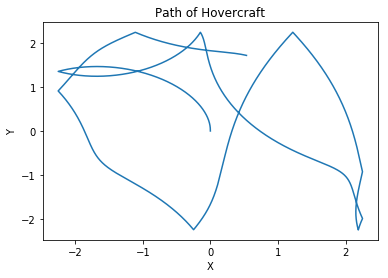

In [104]:
fig1 = plt.figure()
plt.title("Path of Hovercraft")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xarr,yarr)
plt.show()

In [105]:
scene = canvas(title = "Hoverboard")

thick = L/50

#Creating the environment and the hovercraft

Lwall = box(pos = vec(-L/2, 0, 0), size = vec(thick, L, thick), color=color.white)
Rwall = box(pos = vec(L/2, 0, 0), size = vec(thick, L, thick), color=color.white)
Bwall = box(pos = vec(0, -L/2, 0), size = vec(L, thick, thick), color=color.white)
Twall = box(pos = vec(0, L/2, 0), size = vec(L, thick, thick), color=color.white)
Zwall = box(pos = vec(0, 0, -thick/2), size = vec(L, L, thick), color=color.white)

craft = cylinder(pos = vec(0,0,0), radius = Rad, axis = vec(0,0,.05), make_trail = True, color = color.blue)
ref = cylinder(pos = craft.pos, radius = Rad/10, axis = vec(0,Rad,0), color = color.red)

#The reference cylinder is a red line that shows where the front of the craft is facing. It helps display the rotation

scene.pause()

#The loop that makes it all move and rotate

for i in range(0,N):
    rate(200)
    craft.pos.x = xarr[i]
    craft.pos.y = yarr[i]
    ref.pos = craft.pos
    ref.axis.x = -Rad * np.sin(thetaa[i])
    ref.axis.y = Rad * np.cos(thetaa[i])

<IPython.core.display.Javascript object>

In [85]:
varr = np.sqrt(vxarr**2 + vyarr**2)
Kr = .5 * I * omegaa**2
Kt = .5 * m * varr**2
Etot = Kt + Kr

Text(0.5, 1.0, 'Energies Over Time')

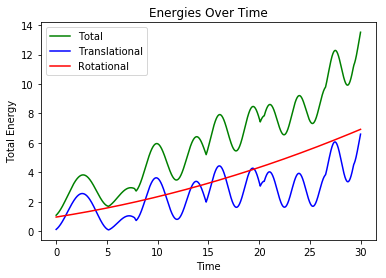

In [86]:
plt.plot(tarr, Etot,'g-', label = 'Total')
plt.plot(tarr, Kt,'b-', label = 'Translational')
plt.plot(tarr, Kr,'r-', label = "Rotational")
plt.legend()
plt.xlabel('Time')
plt.ylabel("Total Energy")
plt.title("Energies Over Time")

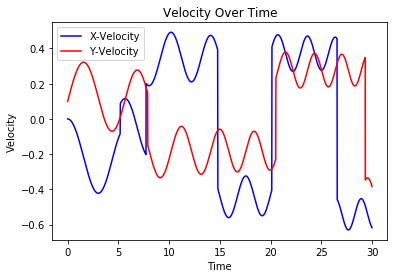

In [87]:
plt.plot(tarr,vxarr,'b-', label = 'X-Velocity')
plt.plot(tarr, vyarr, 'r-', label = 'Y-Velocity')
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title('Velocity Over Time')
plt.legend()


In [88]:
I

7.03125